## Single Neuron Demo

A very simple backpropagation demo using 1 neuron and 1 error function<br>
Also demonstrates what happens with a learning rate thats too high

In [4]:
import matplotlib.pyplot as plt

def plot_errors(errors):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("backpropagate with 1 neuron")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Error")
    # ax.text(0.9, 0.6, "final w1={:.4}".format(w1) + "\nfinal w2={:.4}".format(w2) + "\na="+ str(a) + "\nb=" + str(b)+ "\ntarget=" + str(target),
    #      verticalalignment='bottom', horizontalalignment='right',
    #      transform=ax.transAxes,
    #      color='yellow', fontsize=15,style='italic',bbox={'facecolor':'black', 'alpha':0.5, 'pad':10})

    ax.plot(range(len(errors)), errors)
    plt.show()

In [5]:
def demo(learning_rate, verbose=False):
    '''
    param  learning_rate :how much of dwerror_w to add to w
           a non trivial hyperparameter, should it be .01, .001 .0001?  
           Use learning rate finding algorithm to find 
           (see  “Cyclical Learning Rates for Training Neural Networks”. by Leslie Smith for an intelligent solution)
    return ls: a list of errors
    
    X * w1--
             > (add) -- out1 --error
    y * w2--

    out1 = (x*w1 + y*w2)
    error = 1/2*(correct-out1)**2
    '''
      
    ls=[]
    
    #inputs and expected output
    x=2
    y=3
    correct = 6 #known as the 'ground truth'

    #initial weights,
    # (this is a non trivial decision, the frameworks, PyTorch, Tensorflow, etc,  provide options)
    # different initializtions (try reversing values below and see what w1 and w2 converge to)
    # result in different answers, but they all result in minimized errors
    w2=0.001
    w1=5

    # out1= (x*w1 + y*w2)             #neuron output
    # error = 1/2*(correct-out1)**2   #error function (want this to shrink to 0!)
    # gz=correct-out1=correct-x*w1 - y*w2
    
    #remember
    #f(g)=½(g)**2 and  g(z)=CA - x*w1 - y*w2
    
    dgz_dw1 = -x  # constant derivative (correct-out1)
    dgz_dw2 = -y  # constant derivative

    #usually you train on batches of your data until you have trained on it all, this is called an epoch
    #then you train for several more epochs until you get a low enough error
    for i in range(100):

        # forward pass
        out1 = (x * w1 + y * w2)
        error = 1 / 2 * (correct - out1) ** 2

        if(verbose):
            print(f"For pass {i}, w1 ={w1}, w2={w2}, error is {error}")
        ls.append(error)
        
        # backward pass derivitives (dgz_dw1 dgz_dw2 defined above)
        derror_dgz = (correct - out1) #2/2(correct-out1)

        # chain rule
        derror_dw1 = derror_dgz * dgz_dw1  # shows fastest increase, want decrease, reverse sign
        derror_dw2 = derror_dgz * dgz_dw2

        #adjust weights by subtracting a little bit of derivitive
        #this results in an Out1 that is closer to correct
        w1 = w1-learning_rate * derror_dw1;
        w2 = w2-learning_rate * derror_dw2;
    return ls

As long as the learning rate is not too large, the algorithm converges

For pass 0, w1 =5, w2=0.001, error is 8.0120045
For pass 1, w1 =4.91994, w2=-0.11909, error is 6.064286206050004
For pass 2, w1 =4.8502878, w2=-0.22356830000000005, error is 4.590058229359245
For pass 3, w1 =4.789690386, w2=-0.31446442100000005, error is 3.4742150738020112
For pass 4, w1 =4.7369706358200006, w2=-0.39354404627000006, error is 2.6296333893607438
For pass 5, w1 =4.6911044531634, w2=-0.46234332025490005, error is 1.990369512407148
For pass 6, w1 =4.651200874252158, w2=-0.5221986886217631, error is 1.5065106839409694
For pass 7, w1 =4.616484760599377, w2=-0.574272859100934, error is 1.1402779366749187
For pass 8, w1 =4.586281741721458, w2=-0.6195773874178125, error is 0.863076370269246
For pass 9, w1 =4.560005115297669, w2=-0.6589923270534969, error is 0.6532625046567926
For pass 10, w1 =4.537144450308972, w2=-0.6932833245365423, error is 0.49445438977472633
For pass 11, w1 =4.5172556717688055, w2=-0.7231164923467918, error is 0.37425252762049005
For pass 12, w1 =4.49995243

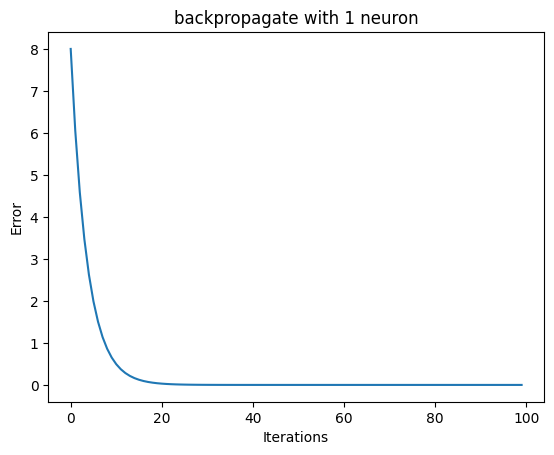

In [15]:
plot_errors(demo(learning_rate=.01))

If it gets too large the algorithm does not

For pass 0, w1 =5, w2=0.001, error is 8.0120045
For pass 1, w1 =3.7190399999999997, w2=-1.9204400000000001, error is 9.345202048800004
For pass 2, w1 =5.1024768, w2=0.15471520000000005, error is 10.90024366972032
For pass 3, w1 =3.608365056, w2=-2.0864524159999998, error is 12.714044216361778
For pass 4, w1 =5.22200573952, w2=0.33400860927999965, error is 14.829661173964377
For pass 5, w1 =3.4792738013184, w2=-2.2800892980224, error is 17.297316793312053
For pass 6, w1 =5.361424294576128, w2=0.543136441864192, error is 20.175590307719183
For pass 7, w1 =3.328701761857782, w2=-2.5059473572133277, error is 23.532808534923657
For pass 8, w1 =5.524042097193596, w2=0.7870631457903938, error is 27.448667875134966
For pass 9, w1 =3.153074535030916, w2=-2.769388197453626, error is 32.01612620955744
For pass 10, w1 =5.713719502166612, w2=1.0715792532499164, error is 37.34360961082781
For pass 11, w1 =2.9482229376600606, w2=-3.0766655935099103, error is 43.557586250069555
For pass 12, w1 =5.9349

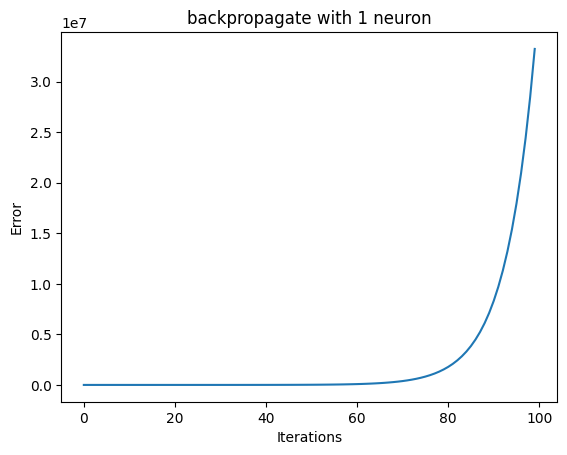

In [16]:
plot_errors(demo(learning_rate=.16,verbose=True))